# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

# Data importation

In [2]:
review = pd.read_csv('Amazon Review.csv')

C:\Users\OnyiCecily\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
review.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
print('Shape of data ==>', review.shape)

Shape of data ==> (34660, 21)


In [5]:
review.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

### Important columns
+ name
+ reviews.text
+ reviews.doRecommend
+ reviews.numHelpful


In [6]:
review = review[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print('Shape of data ==>', review.shape)
review.head()

Shape of data ==> (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


# Data preprocessing

In [7]:
review.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [8]:
review.dropna(inplace=True)
review.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

### We’ll only be considering those products that have at least 500 reviews. 

In [71]:
review = review.groupby('name').filter(lambda x: len(x)>500)
review.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,product far disappoint child love use like abi...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great beginner experienced person buy gift love
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet use learn step nabi thrill ...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,fire hd week love tablet great value prime mem...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,buy grand daughter come visit set user enter a...


### Finding unique products

In [10]:
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [11]:
len(review['name'].unique())

8

### Converting `reviews.doRecommend` and `reviews.numHelpful` to integers

In [12]:
review['reviews.doRecommend'] = review['reviews.doRecommend'].astype(int)
review['reviews.numHelpful'] = review['reviews.numHelpful'].astype(int)

In [13]:
review.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0


## Text Data Cleaning

In [14]:
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

### Some product names contain repeating names separated by three consecutive commas (,,,). 

In [15]:
review['name'] = review['name'].apply(lambda x: x.split(',,,')[0])
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

### Cleaning reviews.text

In [16]:
for index, text in enumerate(review['reviews.text'][35:40]):
    print('Review {}\n {}'.format(index+1, text))

Review 1
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2
 Overall a nice product for traveling purposes Value for money
Review 3
 My children love this table great quality of pictures, excellent camera
Review 4
 I bought 3 tablets and my family was not disappointed.
Review 5
 Great tablet fast screen good size never gives me problem


**Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews.**

In [17]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

### Compile the contactions with re.compile

In [18]:
contractions_re = re.compile('({})'.format('|'.join(contractions_dict.keys())))
contractions_re

re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

## Expand contractions

In [19]:
#Function for expanding contractions
def expand_contractions(text, contractions_dict = contractions_dict):
    
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [20]:
review['reviews.text']= review['reviews.text'].apply(lambda x: expand_contractions(x))

## Converting the reviews to lowercase

In [21]:
review['cleaned'] = review['reviews.text'].apply(lambda x: x.lower())

In [22]:
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed. my c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person. boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd 8 two weeks now and i lo...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...
...,...,...,...,...,...
27874,Amazon Fire Tv,"It has many uses. You can listen to music, che...",1,0,"it has many uses. you can listen to music, che..."
27875,Amazon Fire Tv,"Cost is not outrageous. Easy setup, fun to use...",1,0,"cost is not outrageous. easy setup, fun to use..."
27876,Amazon Fire Tv,I knew about this from its crowd funding start...,1,1,i knew about this from its crowd funding start...
27877,Amazon Fire Tv,This is a neat product but did not fit my need...,0,0,this is a neat product but did not fit my need...


# Remove digits and words containing digits


In [23]:
review['cleaned'] = review['cleaned'].apply(lambda x: re.sub('\w*\d\w*','',x))
review.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed. my c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person. boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd two weeks now and i lov...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...


# Remove Punctuations


In [24]:
review['cleaned'] = review['cleaned'].apply(lambda x: re.sub('[{}]'.format(re.escape(string.punctuation)), ' ',x))
review['cleaned']

0        this product so far has not disappointed  my c...
1        great for beginner or experienced person  boug...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd  two weeks now and i lov...
4        i bought this for my grand daughter when she c...
                               ...                        
27874    it has many uses  you can listen to music  che...
27875    cost is not outrageous  easy setup  fun to use...
27876    i knew about this from its crowd funding start...
27877    this is a neat product but did not fit my need...
27878    responses well and there are lots of skills to...
Name: cleaned, Length: 26068, dtype: object

In [25]:
review['cleaned'] = review['cleaned'].apply(lambda x: re.sub('\s+',' ', x))
review['cleaned']

0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd two weeks now and i love...
4        i bought this for my grand daughter when she c...
                               ...                        
27874    it has many uses you can listen to music check...
27875    cost is not outrageous easy setup fun to use a...
27876    i knew about this from its crowd funding start...
27877    this is a neat product but did not fit my need...
27878    responses well and there are lots of skills to...
Name: cleaned, Length: 26068, dtype: object

In [26]:
for index, text in enumerate(review['cleaned'][35:40]):
    print('Review {}\n {}'.format(index+1, text))

Review 1
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it 
Review 2
 overall a nice product for traveling purposes value for money
Review 3
 my children love this table great quality of pictures excellent camera
Review 4
 i bought tablets and my family was not disappointed 
Review 5
 great tablet fast screen good size never gives me problem


# Document term matrix

- Stopwords Removal
- Lemmatization
- Create Document Term Matrix


In [27]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [28]:
review['cleaned'] = review['cleaned'].apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop))

In [29]:
review_grouped = review[['name','cleaned']].groupby('name').sum()

## Creating a document term matrix

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(review_grouped['cleaned'])
df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df.index = review_grouped.index
df.head(3)

,aa,aaaweather,aamazon,abandon,abc,abcmouse,abd,ability,abilityamazon,abilitybuy,...,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,23,0,1,...,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,37,0,0,...,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,2,0,0,56,0,0,...,0,4,0,0,0,0,2,0,2,0


## Generate wordcloud

In [31]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
    wc = WordCloud(width = 400, height = 330, max_words = 150, colormap='Dark2').generate_from_frequencies(data)
    plt.figure(figsize = (10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title, 60)), fontsize = 13)
    plt.show()



## Transposing the document term matrix

In [32]:
df_dtm = df.transpose()
df_dtm

name,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon Fire Tv,Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,Echo (White),"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case","Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta","Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,"
aa,0,0,0,0,0,1,0,0
aaaweather,0,1,0,0,0,0,0,0
aamazon,0,1,0,0,0,0,0,0
abandon,0,0,1,0,1,0,1,0
abc,0,0,2,1,0,3,11,0
...,...,...,...,...,...,...,...,...
zippy,0,0,0,0,0,0,1,1
zone,0,0,2,0,2,1,2,0
zoo,0,0,0,0,0,0,1,0
zoom,0,0,2,0,0,0,5,0


## ploting wordcloud for each product

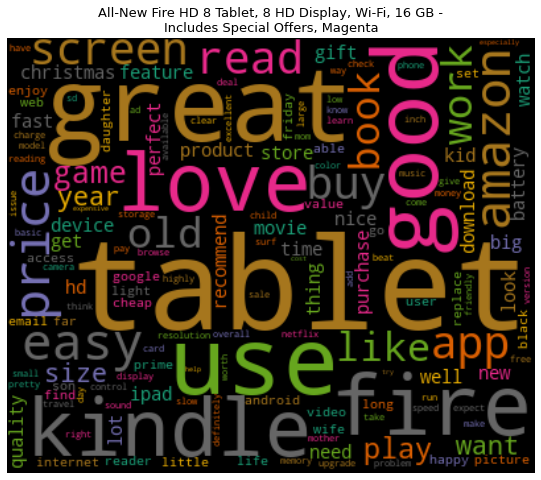

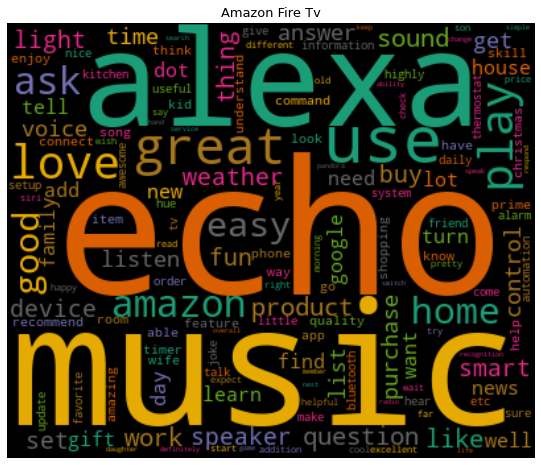

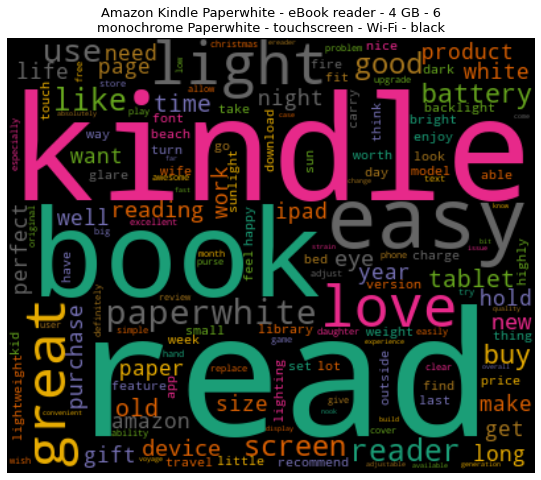

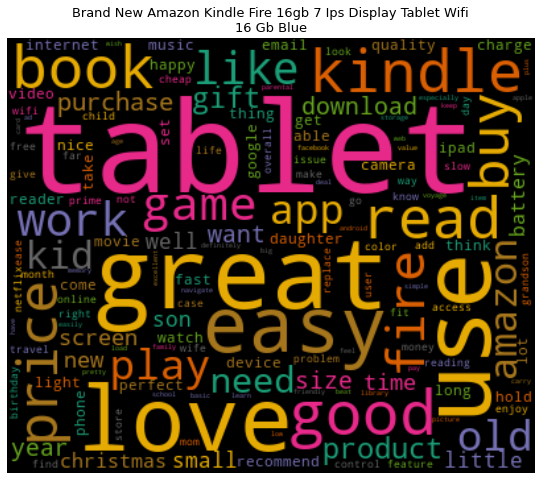

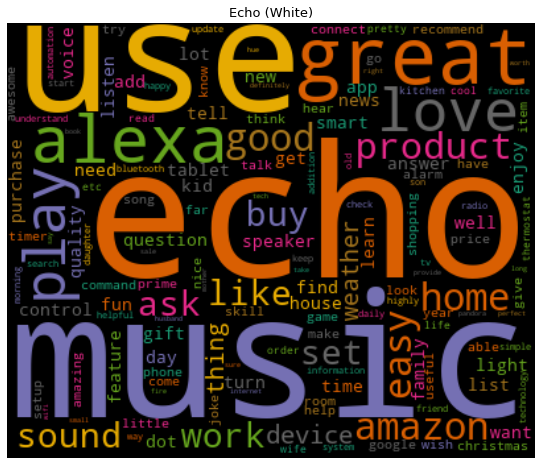

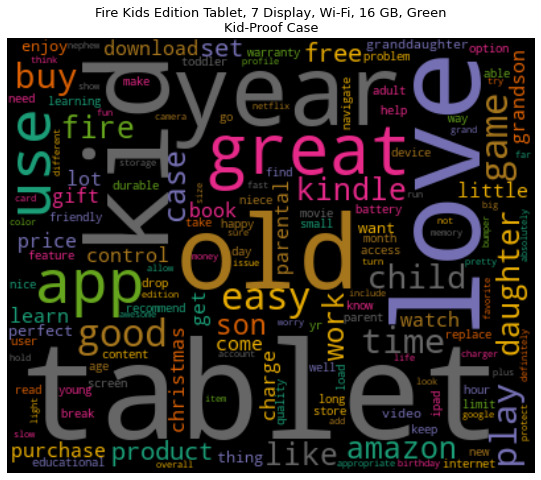

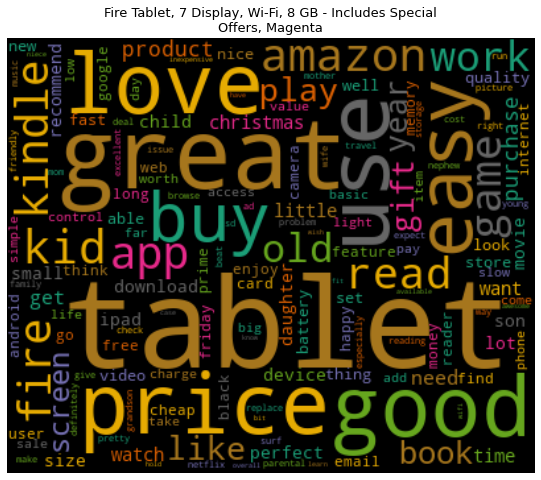

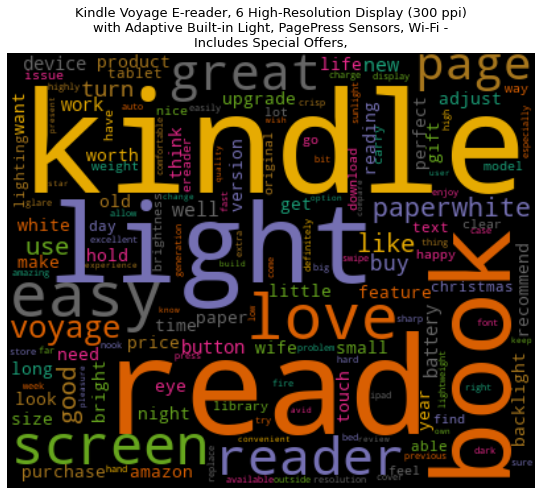

In [33]:
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False), product)   

## Performing Sentiment Analysis  

In [34]:
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,product far disappoint child love use like abi...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great beginner experienced person buy gift love
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet use learn step nabi thrill ...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,fire hd week love tablet great value prime mem...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,buy grand daughter come visit set user enter a...
...,...,...,...,...,...
27874,Amazon Fire Tv,"It has many uses. You can listen to music, che...",1,0,use listen music check weather listen podcast ...
27875,Amazon Fire Tv,"Cost is not outrageous. Easy setup, fun to use...",1,0,cost outrageous easy setup fun use sync iphone...
27876,Amazon Fire Tv,I knew about this from its crowd funding start...,1,1,know crowd funding start wish jump board excel...
27877,Amazon Fire Tv,This is a neat product but did not fit my need...,0,0,neat product fit need bluetooth device recogni...


In [35]:
new = review[['name', 'cleaned' ]]

0        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
1        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
2        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
3        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
4        All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
                               ...                        
26063                                       Amazon Fire Tv
26064                                       Amazon Fire Tv
26065                                       Amazon Fire Tv
26066                                       Amazon Fire Tv
26067                                       Amazon Fire Tv
Name: name, Length: 26068, dtype: object

In [36]:
new.head()

,name,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experienced person buy gift love
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet use learn step nabi thrill ...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",fire hd week love tablet great value prime mem...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",buy grand daughter come visit set user enter a...


## Additional Installations

In [37]:
# pip install spacytextblob
# python -m textblob.download_corpora

In [38]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x221d7d88520>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x221d7d88700>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x221d7b08e40>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x221d7d88ee0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x221d7e49d40>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x221d7e55c80>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x221d7e36120>)]

In [39]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [40]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x221e2521e20>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x221e2521a00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x221e2531270>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x221e2521c40>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x221e0bf2500>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x221e0bf4440>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x221e2531120>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x221e1c01af0>)]

## Example

In [41]:
text = "Bitch why you lyin', bitch you've been cheatin'/Now I gotsta to give your motherfuckin' ass a beatin/I punched her in the ribcage and kicked her in the stomach/Take off all my motherfuckin' jewellery, bitch run it/I stomped her and I kicked her and I punched her in the face"

In [42]:
docx = nlp(text)

In [43]:
nlp(text)._.blob.polarity

0.0

In [44]:
print("Polarity : {}, Subjectivity : {}".format(docx._.blob.polarity,docx._.blob.subjectivity))

Polarity : 0.0, Subjectivity : 0.0


In [45]:
docx._.blob.sentiment_assessments.assessments?

In [46]:
docx._.blob.ngrams()

[WordList(['Bitch', 'why', 'you']),
 WordList(['why', 'you', 'lyin']),
 WordList(['you', 'lyin', 'bitch']),
 WordList(['lyin', 'bitch', 'you']),
 WordList(['bitch', 'you', "'ve"]),
 WordList(['you', "'ve", 'been']),
 WordList(["'ve", 'been', "cheatin'/Now"]),
 WordList(['been', "cheatin'/Now", 'I']),
 WordList(["cheatin'/Now", 'I', 'gotsta']),
 WordList(['I', 'gotsta', 'to']),
 WordList(['gotsta', 'to', 'give']),
 WordList(['to', 'give', 'your']),
 WordList(['give', 'your', 'motherfuckin']),
 WordList(['your', 'motherfuckin', 'ass']),
 WordList(['motherfuckin', 'ass', 'a']),
 WordList(['ass', 'a', 'beatin/I']),
 WordList(['a', 'beatin/I', 'punched']),
 WordList(['beatin/I', 'punched', 'her']),
 WordList(['punched', 'her', 'in']),
 WordList(['her', 'in', 'the']),
 WordList(['in', 'the', 'ribcage']),
 WordList(['the', 'ribcage', 'and']),
 WordList(['ribcage', 'and', 'kicked']),
 WordList(['and', 'kicked', 'her']),
 WordList(['kicked', 'her', 'in']),
 WordList(['her', 'in', 'the']),
 Word

In [47]:
new['Polarity'] = new['cleaned'].apply(lambda x: nlp(x)._.blob.polarity)

<ipython-input-47-4a1e095e1671>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Polarity'] = new['cleaned'].apply(lambda x: nlp(x)._.blob.polarity)


In [48]:
new

,name,cleaned,Polarity
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...,0.300000
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experienced person buy gift love,0.700000
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet use learn step nabi thrill ...,0.000000
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",fire hd week love tablet great value prime mem...,0.432222
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",buy grand daughter come visit set user enter a...,0.314063
...,...,...,...
27874,Amazon Fire Tv,use listen music check weather listen podcast ...,0.000000
27875,Amazon Fire Tv,cost outrageous easy setup fun use sync iphone...,-0.088889
27876,Amazon Fire Tv,know crowd funding start wish jump board excel...,0.512500
27877,Amazon Fire Tv,neat product fit need bluetooth device recogni...,0.533333


In [49]:
new['Subjectivity'] = new['cleaned'].apply(lambda x: nlp(x)._.blob.subjectivity )

<ipython-input-49-43051c15e49e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Subjectivity'] = new['cleaned'].apply(lambda x: nlp(x)._.blob.subjectivity )


In [50]:
new

,name,cleaned,Polarity,Subjectivity
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...,0.300000,0.800000
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experienced person buy gift love,0.700000,0.750000
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet use learn step nabi thrill ...,0.000000,0.000000
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",fire hd week love tablet great value prime mem...,0.432222,0.753333
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",buy grand daughter come visit set user enter a...,0.314063,0.571379
...,...,...,...,...
27874,Amazon Fire Tv,use listen music check weather listen podcast ...,0.000000,0.000000
27875,Amazon Fire Tv,cost outrageous easy setup fun use sync iphone...,-0.088889,0.677778
27876,Amazon Fire Tv,know crowd funding start wish jump board excel...,0.512500,0.621875
27877,Amazon Fire Tv,neat product fit need bluetooth device recogni...,0.533333,0.500000


In [51]:
new

,name,cleaned,Polarity,Subjectivity
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...,0.300000,0.800000
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experienced person buy gift love,0.700000,0.750000
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet use learn step nabi thrill ...,0.000000,0.000000
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",fire hd week love tablet great value prime mem...,0.432222,0.753333
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",buy grand daughter come visit set user enter a...,0.314063,0.571379
...,...,...,...,...
27874,Amazon Fire Tv,use listen music check weather listen podcast ...,0.000000,0.000000
27875,Amazon Fire Tv,cost outrageous easy setup fun use sync iphone...,-0.088889,0.677778
27876,Amazon Fire Tv,know crowd funding start wish jump board excel...,0.512500,0.621875
27877,Amazon Fire Tv,neat product fit need bluetooth device recogni...,0.533333,0.500000


In [52]:
new.groupby("name").describe()

Polarity            \
                                                      count      mean   
name                                                                    
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...   2814.0  0.366268   
Amazon Fire Tv                                       2527.0  0.362986   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...   3176.0  0.367236   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...   1030.0  0.363729   
Echo (White)                                         3300.0  0.373988   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...   1679.0  0.345631   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  10962.0  0.369230   
Kindle Voyage E-reader, 6 High-Resolution Displ...    580.0  0.343687   

                                                                        \
                                                         std       min   
name                                                                     
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.255321 -0.800000   
Amazon Fire Tv                                      0.242809 -0.800000   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.230959 -0.800000   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.271027 -0.800000   
Echo (White)                                        0.238612 -0.750000   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...  0.254909 -0.666667   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  0.268371 -1.000000   
Kindle Voyage E-reader, 6 High-Resolution Displ...  0.223615 -0.400000   

                                                                        \
                                                         25%       50%   
name                                                                     
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.200000  0.376190   
Amazon Fire Tv                                      0.220833  0.386667   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.221550  0.370833   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.177865  0.383854   
Echo (White)                                        0.228571  0.400000   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...  0.197381  0.350000   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  0.200000  0.392857   
Kindle Voyage E-reader, 6 High-Resolution Displ...  0.203923  0.357143   

                                                                   \
                                                         75%  max   
name                                                                
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...  0.522484  1.0   
Amazon Fire Tv                                      0.500000  1.0   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...  0.500000  1.0   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...  0.550000  1.0   
Echo (White)                                        0.506786  1.0   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...  0.500000  1.0   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...  0.546458  1.0   
Kindle Voyage E-reader, 6 High-Resolution Displ...  0.498214  1.0   

                                                   Subjectivity            \
                                                          count      mean   
name                                                                        
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...       2814.0  0.584474   
Amazon Fire Tv                                           2527.0  0.567716   
Amazon Kindle Paperwhite - eBook reader - 4 GB ...       3176.0  0.596242   
Brand New Amazon Kindle Fire 16gb 7 Ips Display...       1030.0  0.583700   
Echo (White)                                             3300.0  0.576741   
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...       1679.0  0.569857   
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes ...      10962.0  0.587428   
Kindle Voyage E-reader, 6 High-Resolution Displ...        580.0  0.585345   

         

In [53]:
new.isnull().sum()

name            0
cleaned         0
Polarity        0
Subjectivity    0
dtype: int64

In [54]:
new.to_csv("new_sentiment.csv", index= False)

In [55]:
new = pd.read_csv("new_sentiment.csv")

In [56]:
new.head()

,name,cleaned,Polarity,Subjectivity
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...,0.300000,0.800000
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experienced person buy gift love,0.700000,0.750000
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet use learn step nabi thrill ...,0.000000,0.000000
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",fire hd week love tablet great value prime mem...,0.432222,0.753333
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",buy grand daughter come visit set user enter a...,0.314063,0.571379


In [57]:
new['name'].value_counts()

Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                                                           10962
Echo (White)                                                                                                                                      3300
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black                                            3176
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                                                           2814
Amazon Fire Tv                                                                                                                                    2527
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                                                           1679
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue                        

<AxesSubplot:>

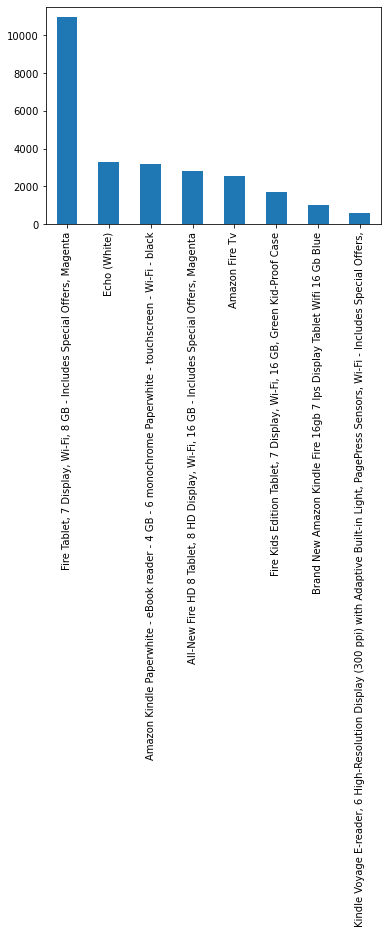

In [58]:
new['name'].value_counts().plot(kind = 'bar')

<img src = 'img.PNG'>

In [59]:
new.groupby('name')['Polarity'].sum()

name
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                                                          1030.677833
Amazon Fire Tv                                                                                                                                    917.264877
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black                                           1166.341410
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue                                                                            374.640457
Echo (White)                                                                                                                                     1234.158799
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                                                           580.314454
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Specia

In [60]:
new.loc[new["Polarity"]>0.5]

,name,cleaned,Polarity,Subjectivity
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experienced person buy gift love,0.700000,0.750000
5,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",amazon fire inch tablet perfect size purchase ...,0.566667,0.566667
6,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great e reading nice light weight price point ...,0.525000,0.637500
11,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",excellent product easy use large screen make w...,0.520238,0.773810
16,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",nice reader perfect want need good bargain,0.766667,0.866667
...,...,...,...,...
26056,Amazon Fire Tv,easy operate come handy news weather good way ...,0.577778,0.777778
26057,Amazon Fire Tv,great product easy install use love music amaz...,0.577778,0.727778
26061,Amazon Fire Tv,think sure add t p egg shampoo grocery list al...,0.543750,0.740972
26065,Amazon Fire Tv,know crowd funding start wish jump board excel...,0.512500,0.621875


In [61]:
import numpy as np

In [62]:
Sentiment = []

for row in new["Polarity"]:
    if row > 0:
        Sentiment.append("Positive")
    elif row  < 0:
        Sentiment.append("Negative")
    elif row ==0:
        Sentiment.append("Neutral")

In [63]:
Sentiment


['Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positi

In [64]:
Sentiments = pd.Series(Sentiment)

In [65]:
new.shape

(26068, 4)

In [66]:
Sentiments

0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
26063     Neutral
26064    Negative
26065    Positive
26066    Positive
26067     Neutral
Length: 26068, dtype: object

In [67]:
data = new.assign(Sentiment = Sentiments)

In [68]:
data

,name,cleaned,Polarity,Subjectivity,Sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...,0.300000,0.800000,Positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experienced person buy gift love,0.700000,0.750000,Positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet use learn step nabi thrill ...,0.000000,0.000000,Neutral
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",fire hd week love tablet great value prime mem...,0.432222,0.753333,Positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",buy grand daughter come visit set user enter a...,0.314063,0.571379,Positive
...,...,...,...,...,...
26063,Amazon Fire Tv,use listen music check weather listen podcast ...,0.000000,0.000000,Neutral
26064,Amazon Fire Tv,cost outrageous easy setup fun use sync iphone...,-0.088889,0.677778,Negative
26065,Amazon Fire Tv,know crowd funding start wish jump board excel...,0.512500,0.621875,Positive
26066,Amazon Fire Tv,neat product fit need bluetooth device recogni...,0.533333,0.500000,Positive
